# SemesterSense: MOOC Certificate Prediction

**Name-** Y.Abhiram

**Email-** yarlagaddaabhi5@gmail.com

**Contact No-** 9063313555

#**Project Title:**Semester-Wise Student Engagement and Certification Prediction in MOOCs using Ensemble Learning

**Problem Statement:**
In Massive Open Online Courses (MOOCs), student engagement and certification rates vary across Fall, Spring, and Summer. This project aims to analyze engagement patterns and predict the semester in which a student is most likely to earn a certificate. By leveraging resembling techniques in ensemble learning, we will develop a robust classification model to enhance prediction accuracy and uncover key factors influencing certification trends.

**1. Importing the dataSet**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

**2.Loading the dataset**

In [27]:
#Load and Inspect the Dataset
df = pd.read_csv('/content/mooc_dataset.csv')

**3. Displaying the Colums in the dataset**


In [30]:
# Strip spaces from column names
df.columns = df.columns.str.strip()
# Print dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 124030 rows and 22 columns.


**4.Displaying DataSet information**

In [31]:
# Display first five rows
print("First 5 Rows:")
display(df.head())

First 5 Rows:


,Unnamed: 0,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
0,4,HarvardX,PH207x,2012,Fall,MHxPC130313697,0,0,0,India,...,0.0,24-07-2012,27-07-2013,6,3,197757,0,0,0,23
1,6,HarvardX,PH207x,2012,Fall,MHxPC130237753,1,0,0,United States,...,0.0,24-07-2012,24-12-2012,107,8,7,2,0,0,19
2,7,HarvardX,CS50x,2012,Summer,MHxPC130202970,1,0,0,United States,...,0.0,24-07-2012,28-03-2013,8,1,197757,1,0,0,24
3,20,HarvardX,CS50x,2012,Summer,MHxPC130223941,1,0,0,Other Middle East/Central Asia,...,0.0,24-07-2012,15-07-2013,25,2,197757,4,0,0,20
4,22,HarvardX,PH207x,2012,Fall,MHxPC130317399,0,0,0,Australia,...,0.0,24-07-2012,25-08-2012,3,2,197757,0,0,0,32


In [32]:
# Display last five rows
print("Last 5 Rows:")
display(df.tail())

Last 5 Rows:


,Unnamed: 0,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
124025,259164,HarvardX,CB22x,2013,Spring,MHxPC130583330,1,0,0,United States,...,0.0,21-03-2013,05-04-2013,59,2,197757,2,0,0,35
124026,259165,HarvardX,CS50x,2012,Spring,MHxPC130276744,1,1,0,India,...,0.0,21-03-2013,22-03-2013,63,2,197757,6,0,0,22
124027,259166,HarvardX,CB22x,2013,Spring,MHxPC130408767,1,0,0,Greece,...,0.0,21-03-2013,21-03-2013,22,1,197757,2,0,0,21
124028,259167,HarvardX,PH278x,2013,Spring,MHxPC130582237,0,0,0,Germany,...,0.0,21-03-2013,21-03-2013,1,1,197757,0,0,0,50
124029,259168,HarvardX,ER22x,2013,Spring,MHxPC130082605,0,0,0,Other South Asia,...,0.0,21-03-2013,22-03-2013,4,2,197757,0,0,0,21


**5.Check for Missing Values**

In [33]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Unnamed: 0              0
institute               0
course_id               0
year                    0
semester                0
userid_DI               0
viewed                  0
explored                0
certified               0
final_cc_cname_DI       0
LoE_DI                  0
gender               5711
grade                   0
start_time_DI           0
last_event_DI           0
nevents                 0
ndays_act               0
nplay_video             0
nchapters               0
nforum_posts            0
incomplete_flag         0
age                     0
dtype: int64


**6.Statistical Summary and Datatypes**

In [34]:
# Data types of columns
print("Column Data Types:")
print(df.dtypes)

Column Data Types:
Unnamed: 0             int64
institute             object
course_id             object
year                   int64
semester              object
userid_DI             object
viewed                 int64
explored               int64
certified              int64
final_cc_cname_DI     object
LoE_DI                object
gender                object
grade                float64
start_time_DI         object
last_event_DI         object
nevents                int64
ndays_act              int64
nplay_video            int64
nchapters              int64
nforum_posts           int64
incomplete_flag        int64
age                    int64
dtype: object


In [35]:
# Summary statistics
print("Statistical Summary:\n")
display(df.describe())

Statistical Summary:



,Unnamed: 0,year,viewed,explored,certified,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
count,124030.000000,124030.000000,124030.000000,124030.000000,124030.000000,124030.000000,124030.000000,124030.000000,124030.000000,124030.000000,124030.000000,124030.000000,124030.000000
mean,151623.843288,2012.469991,0.690962,0.119229,0.040740,0.046788,276.502129,5.265202,157680.588769,3.122898,0.022301,0.008474,28.583746
std,77595.886775,0.499101,0.462099,0.324059,0.197688,0.185134,1085.508790,9.708520,79449.571785,4.992364,0.206567,0.091663,9.384360
min,4.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
25%,86202.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,197757.000000,0.000000,0.000000,0.000000,23.000000
50%,160796.500000,2012.000000,1.000000,0.000000,0.000000,0.000000,16.000000,2.000000,197757.000000,2.000000,0.000000,0.000000,26.000000
75%,224534.500000,2013.000000,1.000000,0.000000,0.000000,0.000000,103.000000,5.000000,197757.000000,3.000000,0.000000,0.000000,32.000000
max,259168.000000,2013.000000,1.000000,1.000000,1.000000,1.000000,43880.000000,159.000000,197757.000000,34.000000,7.000000,1.000000,82.000000


**6: Defining Features (X) and Target (y)**

In [36]:
# Define Features (X) and Target (y)
X = df.drop(columns=['semester'])  # Features
y = df['semester']  # Target

In [37]:
# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

**7.Handle Missing Values**

In [38]:
# Handle Missing Values
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')
X[num_cols] = num_imputer.fit_transform(X[num_cols])
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

**8.Exploratory Data Analysis(EDA)**

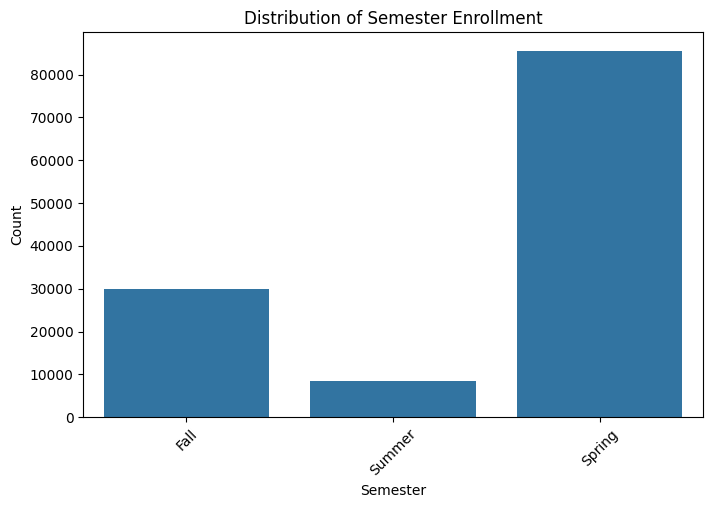

In [39]:
#  Bar Plot - SemesterTrends
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="semester")
plt.title("Distribution of Semester Enrollment")
plt.xlabel("Semester")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


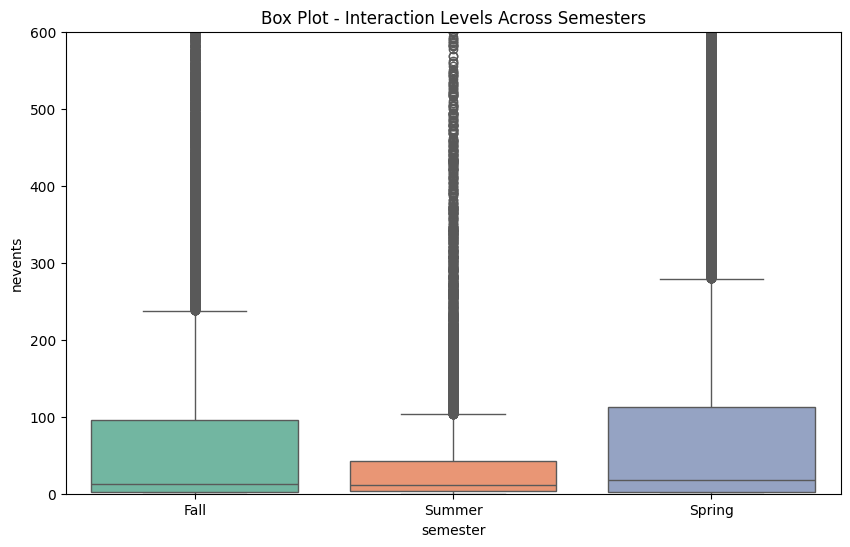

In [40]:
#  Box Plot - SemesterTrends
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="semester", y="nevents",hue="semester",palette="Set2")
plt.title("Box Plot - Interaction Levels Across Semesters")
plt.ylim(0, 600)
plt.show()

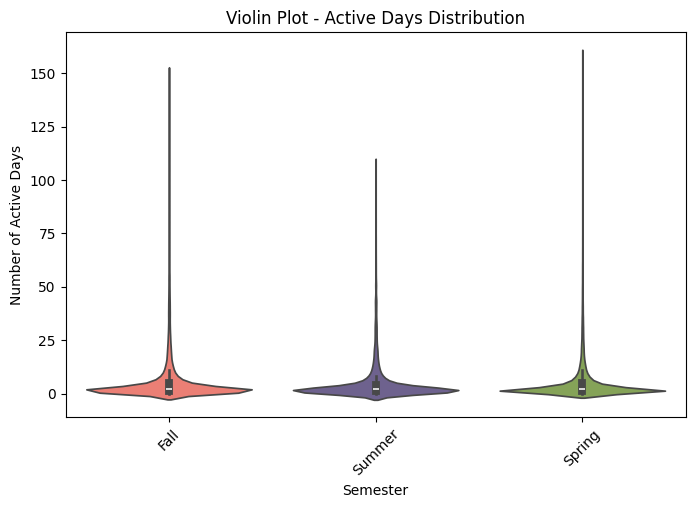

In [41]:
#  Violin Plot - SemesterTrends
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="semester", y="ndays_act",hue='semester', palette=["#FF6F61", "#6B5B95", "#88B04B"], legend=False)
plt.title("Violin Plot - Active Days Distribution")
plt.xlabel("Semester")
plt.ylabel("Number of Active Days")
plt.xticks(rotation=45)
plt.show()


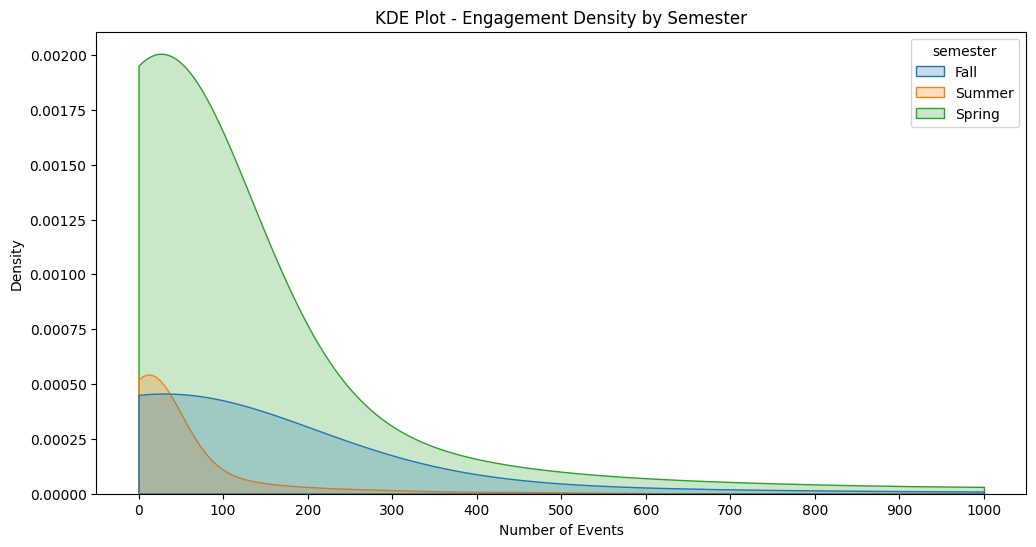

In [42]:
#  KDE Plot - SemesterTrends
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x="nevents", hue="semester", fill=True, clip=(0, 1000))
plt.title("KDE Plot - Engagement Density by Semester")
plt.xlabel("Number of Events")
plt.ylabel("Density")
plt.xticks(range(0, 1001, 100))
plt.show()

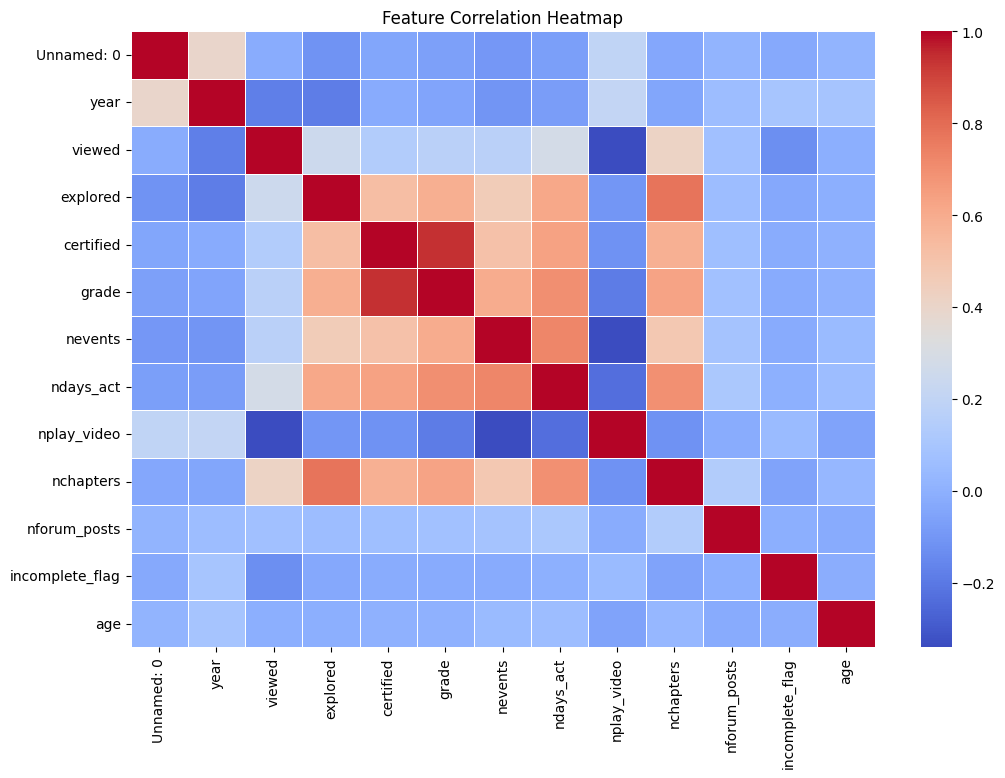

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**9.Pre-Processing and Scaling**

In [44]:
# Preprocessing - Encoding & Scaling
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

X = preprocessor.fit_transform(X)

**10.Training and Testing the data sets**


Train-Test Split Summary:
Training Set: (86821, 111507), Testing Set: (37209, 111507)
Training Labels: (86821,), Testing Labels: (37209,)


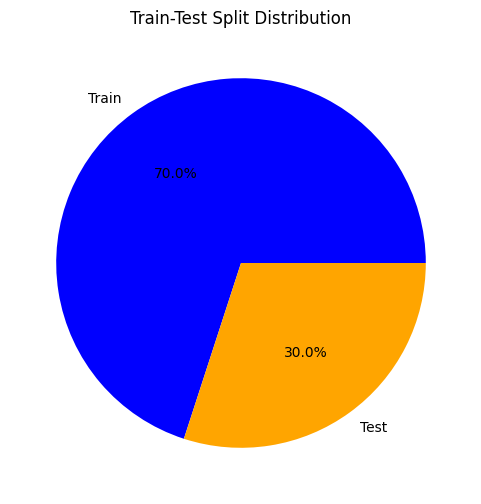

Preprocessing Completed! Data is ready for modeling.


In [45]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print the Shape of Training and Testing Sets
print("\nTrain-Test Split Summary:")
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")
print(f"Training Labels: {y_train.shape}, Testing Labels: {y_test.shape}")

# Plot Pie Chart for Train-Test Distribution
plt.figure(figsize=(6, 6))
plt.pie([len(y_train), len(y_test)], labels=['Train', 'Test'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title("Train-Test Split Distribution")
plt.show()

print("Preprocessing Completed! Data is ready for modeling.")

**11.Evaluate Classification Models**

              precision    recall  f1-score   support

        Fall       0.92      0.87      0.89      9011
      Spring       0.95      0.97      0.96     25679
      Summer       0.84      0.75      0.79      2519

    accuracy                           0.93     37209
   macro avg       0.90      0.86      0.88     37209
weighted avg       0.93      0.93      0.93     37209



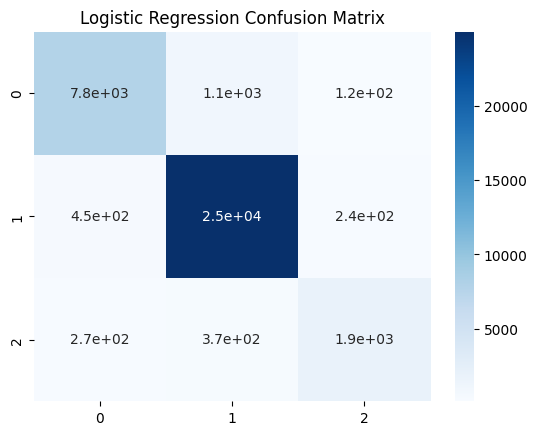

In [46]:
# Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, average='macro')
rec_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
print(classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

        Fall       0.99      0.99      0.99      9011
      Spring       1.00      1.00      1.00     25679
      Summer       0.97      0.97      0.97      2519

    accuracy                           0.99     37209
   macro avg       0.98      0.99      0.98     37209
weighted avg       0.99      0.99      0.99     37209



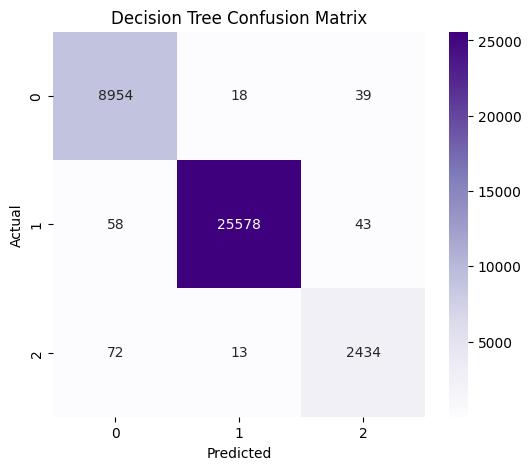

In [47]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='macro')
rec_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
print(classification_report(y_test, y_pred_dt))
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap="Purples", fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


              precision    recall  f1-score   support

        Fall       0.95      0.89      0.92      9011
      Spring       0.94      0.99      0.97     25679
      Summer       0.94      0.70      0.80      2519

    accuracy                           0.95     37209
   macro avg       0.95      0.86      0.90     37209
weighted avg       0.95      0.95      0.94     37209



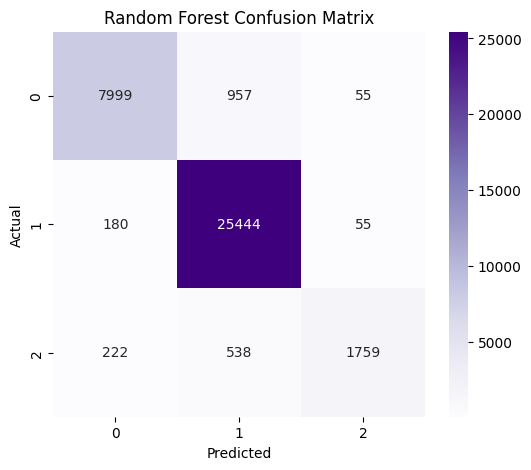

In [48]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='macro')
rec_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
print(classification_report(y_test, y_pred_rf))
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Purples", fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

              precision    recall  f1-score   support

        Fall       0.83      0.80      0.81      9011
      Spring       0.92      0.96      0.94     25679
      Summer       0.78      0.56      0.65      2519

    accuracy                           0.89     37209
   macro avg       0.84      0.77      0.80     37209
weighted avg       0.89      0.89      0.89     37209



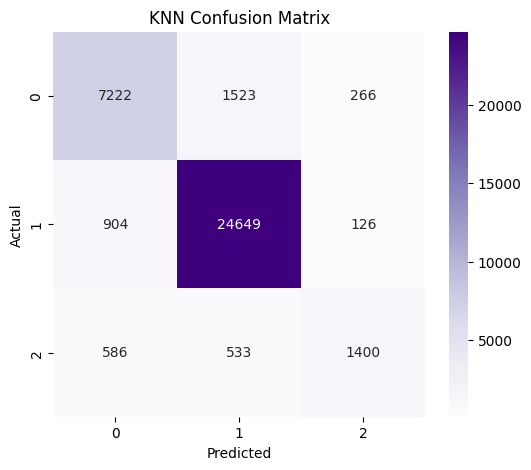

In [49]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn, average='macro')
rec_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
print(classification_report(y_test, y_pred_knn))
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap="Purples", fmt='d')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [50]:
classification_results_df = pd.DataFrame({
    'Model': ["Logistic Regression", "Decision Tree", "Random Forest", "KNN"],
    'Accuracy': [acc_lr, acc_dt, acc_rf,  acc_knn],
    'Precision': [prec_lr, prec_dt, prec_rf, prec_knn],
    'Recall': [rec_lr, rec_dt, rec_rf, rec_knn],
    'F1 Score': [f1_lr, f1_dt, f1_rf, f1_knn]
})
print("\nClassification Models Comparison:")
print(classification_results_df.sort_values(by='Accuracy', ascending=False))


Classification Models Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
1        Decision Tree  0.993469   0.983962  0.985333  0.984641
2        Random Forest  0.946061   0.945933  0.858945  0.895882
0  Logistic Regression  0.931710   0.899246  0.861772  0.879341
3                  KNN  0.894165   0.844411  0.772377  0.801859


**12.Train and Evaluate Ensemble methods**

              precision    recall  f1-score   support

        Fall       0.99      0.99      0.99      9011
      Spring       1.00      1.00      1.00     25679
      Summer       0.96      0.97      0.96      2519

    accuracy                           0.99     37209
   macro avg       0.98      0.99      0.98     37209
weighted avg       0.99      0.99      0.99     37209



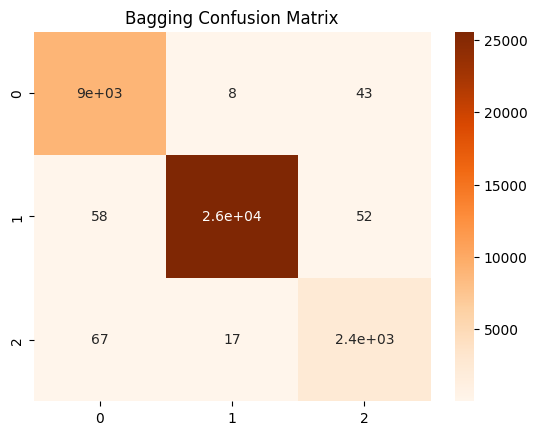

In [52]:
# Bagging
bag = BaggingClassifier(estimator=DecisionTreeClassifier())
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)
prec_bag = precision_score(y_test, y_pred_bag, average='macro')
rec_bag = recall_score(y_test, y_pred_bag, average='macro')
f1_bag = f1_score(y_test, y_pred_bag, average='macro')
print(classification_report(y_test, y_pred_bag))
sns.heatmap(confusion_matrix(y_test, y_pred_bag), annot=True, cmap="Oranges")
plt.title("Bagging Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

        Fall       0.91      0.75      0.82      9011
      Spring       0.90      0.98      0.94     25679
      Summer       0.80      0.54      0.65      2519

    accuracy                           0.90     37209
   macro avg       0.87      0.76      0.80     37209
weighted avg       0.90      0.90      0.89     37209



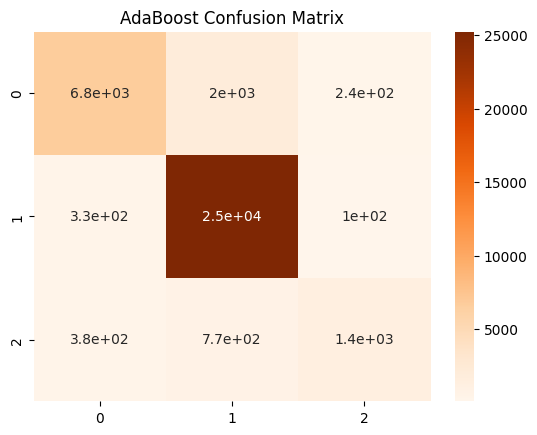

In [53]:
# AdaBoost
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada)
prec_ada = precision_score(y_test, y_pred_ada, average='macro', zero_division=0)
rec_ada = recall_score(y_test, y_pred_ada, average='macro', zero_division=0)
f1_ada = f1_score(y_test, y_pred_ada, average='macro', zero_division=0)
print(classification_report(y_test, y_pred_ada, zero_division=0))
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, cmap="Oranges")
plt.title("AdaBoost Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

        Fall       0.93      0.93      0.93      9011
      Spring       0.97      0.98      0.97     25679
      Summer       0.86      0.79      0.82      2519

    accuracy                           0.95     37209
   macro avg       0.92      0.90      0.91     37209
weighted avg       0.95      0.95      0.95     37209



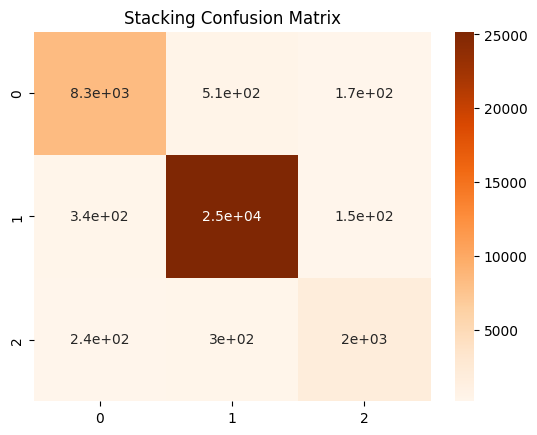

In [54]:
# Stacking
stack = StackingClassifier(estimators=[("rf", RandomForestClassifier())], final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)
prec_stack = precision_score(y_test, y_pred_stack, average='macro')
rec_stack = recall_score(y_test, y_pred_stack, average='macro')
f1_stack = f1_score(y_test, y_pred_stack, average='macro')
print(classification_report(y_test, y_pred_stack))
sns.heatmap(confusion_matrix(y_test, y_pred_stack), annot=True, cmap="Oranges")
plt.title("Stacking Confusion Matrix")
plt.show()


Ensemble Models Comparison:
  Ensemble Model  Accuracy  Precision    Recall  F1 Score
0        Bagging  0.993416   0.982572  0.985570  0.984063
2       Stacking  0.954151   0.921734  0.897582  0.909072
1       AdaBoost  0.897579   0.869547  0.760071  0.803674


<Figure size 1000x600 with 0 Axes>

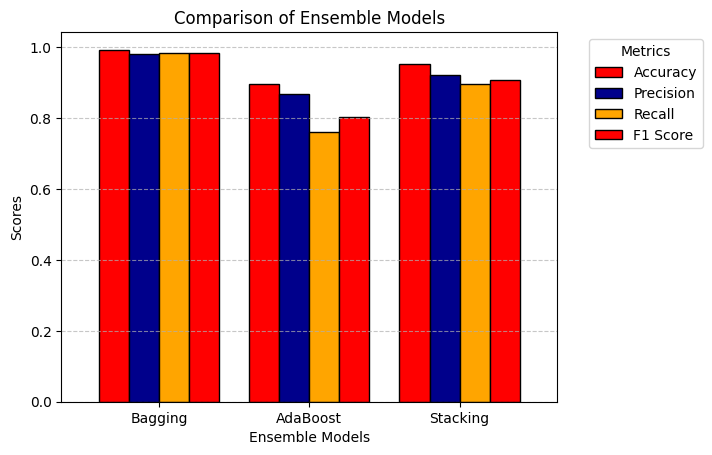

In [55]:
ensemble_results_df = pd.DataFrame({
    'Ensemble Model': ["Bagging", "AdaBoost", "Stacking"],
    'Accuracy': [acc_bag, acc_ada, acc_stack],
    'Precision': [prec_bag, prec_ada, prec_stack],
    'Recall': [rec_bag, rec_ada, rec_stack],
    'F1 Score': [f1_bag, f1_ada, f1_stack]
})
print("\nEnsemble Models Comparison:")
print(ensemble_results_df.sort_values(by='Accuracy', ascending=False))

# Bar Graph - Ensemble Models Comparison
plt.figure(figsize=(10, 6))
colors = ["red", "darkblue", "orange"]
ensemble_results_df.set_index("Ensemble Model").plot(
    kind="bar", color=colors, edgecolor="black", width=0.8
)
plt.title("Comparison of Ensemble Models")
plt.xlabel("Ensemble Models")
plt.ylabel("Scores")
plt.xticks(rotation=0)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()


In [56]:
# Creating a dictionary of ensemble models and their accuracies
model_accuracies = {
    "Bagging": acc_bag,
    "AdaBoost": acc_ada,
    "Stacking": acc_stack
}
best_accuracy = max(model_accuracies.values())
best_models = [model for model, acc in model_accuracies.items() if acc == best_accuracy]

# Displaying the best model(s)
print(f"🏆 Best Model(s): {', '.join(best_models)} with Accuracy: {best_accuracy:.4f}")

🏆 Best Model(s): Bagging with Accuracy: 0.9934
